## EXAMPLE 1

In [6]:
'''
Write regular time-series data to example.dss

Notes:
     The interval must be [any] integer greater than 0 for regular time-series.
     Actual time-series interval implied from E-Part of pathname
     The values attribute can be list, array or numpy array

'''
from datetime import datetime
from pydsstools.heclib.dss import HecDss
from pydsstools.core import TimeSeriesContainer,UNDEFINED

dss_file = "example.dss"
pathname = "/REGULAR/TIMESERIES/FLOW//1HOUR/Ex1/"
tsc = TimeSeriesContainer()
tsc.pathname = pathname
tsc.startDateTime="15JUL2019 19:00:00"
tsc.numberValues = 5
tsc.units = "cfs"
tsc.type = "INST"
tsc.interval = 1
tsc.values = [100,UNDEFINED,500,5000,10000]

fid = HecDss.Open(dss_file)
fid.deletePathname(tsc.pathname)
fid.put_ts(tsc)
ts = fid.read_ts(pathname)
fid.close()


## EXAMPLE 2

C:\Users\rjl\.conda\envs\flood01_win10\lib\site-packages\pandas\plotting\_matplotlib\converter.py:102: FutureWarning: Using an implicitly registered datetime converter for a matplotlib plotting method. The converter was registered by pandas on import. Future versions of pandas will require you to explicitly register matplotlib converters.

To register the converters:
	>>> from pandas.plotting import register_matplotlib_converters
	>>> register_matplotlib_converters()
  warnings.warn(msg, FutureWarning)


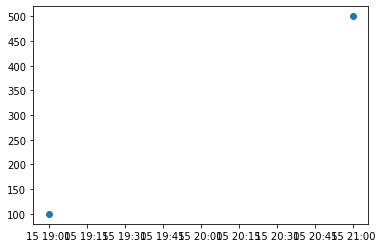

In [7]:
'''
Read and plot regular time-series
'''
%matplotlib inline
from pydsstools.heclib.dss import HecDss
import matplotlib.pyplot as plt
import numpy as np

dss_file = "example.dss"
pathname = "/REGULAR/TIMESERIES/FLOW//1HOUR/Ex1/"
startDate = "15JUL2019 19:00:00"
endDate = "15JUL2019 21:00:00"

fid = HecDss.Open(dss_file)
ts = fid.read_ts(pathname,window=(startDate,endDate),trim_missing=True)

times = np.array(ts.pytimes)
values = ts.values
plt.plot(times[~ts.nodata],values[~ts.nodata],"o")
plt.show()
fid.close()


## EXAMPLE 3

In [8]:
'''
Write irregular time-series data

Notes:
     The interval must be [any] integer <= 0 for irregular time-series.
     DParts: IR-MONTH, IR-YEAR, IR-DECADE, IR-CENTURY

'''
from datetime import datetime
from pydsstools.heclib.dss import HecDss
from pydsstools.core import TimeSeriesContainer, UNDEFINED

dss_file = "example.dss"
pathname = "/IRREGULAR/TIMESERIES/FLOW//IR-DECADE/Ex3/"

tsc = TimeSeriesContainer()
tsc.numberValues = 5
tsc.pathname = pathname
tsc.units ="cfs"
tsc.type = "INST"
tsc.interval = -1
tsc.values = [100,UNDEFINED,500,5000,10000]


tsc.times = [datetime(1900,1,12),datetime(1950,6,2,12),
             datetime(1999,12,31,23,0,0),datetime(2009,1,20),
             datetime(2019,7,15,5,0)]

with HecDss.Open(dss_file) as fid:
    status = fid.put_ts(tsc)


## EXAMPLE 4

In [9]:
'''
Read irregular time-series data


'''
from pydsstools.heclib.dss import HecDss

dss_file = "example.dss"
pathname = "/IRREGULAR/TIMESERIES/FLOW//IR-DECADE/Ex3/"

with HecDss.Open(dss_file) as fid:
    ts = fid.read_ts(pathname,regular=False,window_flag=0)
    print(ts.pytimes)
    print(ts.values)
    print(ts.nodata)
    print(ts.empty)


[datetime.datetime(1900, 1, 12, 0, 0), datetime.datetime(1950, 6, 2, 12, 0), datetime.datetime(1999, 12, 31, 23, 0), datetime.datetime(2009, 1, 20, 0, 0), datetime.datetime(2019, 7, 15, 5, 0)]
[ 1.0000000e+02 -3.4028235e+38  5.0000000e+02  5.0000000e+03
  1.0000000e+04]
[False  True False False False]
False


## EXAMPLE 5

In [10]:
'''
Write paired data-series
'''
import numpy as np
from pydsstools.heclib.dss import HecDss
from pydsstools.core import PairedDataContainer

dss_file = "example.dss"
pathname ="/PAIRED/DATA/FREQ-FLOW///Ex5/"

pdc = PairedDataContainer()
pdc.pathname = pathname
pdc.curve_no = 2
pdc.independent_axis = list(range(1,10))
pdc.data_no = 9
pdc.curves = np.array([[5,50,500,5000,50000,10,100,1000,10000],
                       [11,11,11,11,11,11,11,11,11]],dtype=np.float32)
pdc.labels_list = ['Column 1','Elevens']

fid = HecDss.Open(dss_file)
fid.put_pd(pdc)
fid.close()


## EXAMPLE 6

In [11]:
'''
Read paired data-series

Notes:
    Row and column/curve indices start at 1 (not zero)

'''
from pydsstools.heclib.dss import HecDss

dss_file = "example.dss"
pathname ="/PAIRED/DATA/FREQ-FLOW///Ex5/"

#labels_list = ['Column 1','Elevens']

with HecDss.Open(dss_file) as fid:
    read_all = fid.read_pd(pathname)

    row1,row2 = (2,4)
    col1,col2 = (1,2)
    read_partial = fid.read_pd(pathname,window=(row1,row2,col1,col2))


## EXAMPLE 7

In [14]:
'''
Pre-allocate paired data-series
'''
from pydsstools.heclib.dss import HecDss

dss_file = "example.dss"
pathname ="/PAIRED/PREALLOCATED DATA/FREQ-FLOW///Ex7/"

with HecDss.Open(dss_file) as fid:
    rows = 10
    curves = 15
    fid.preallocate_pd((rows,curves),pathname=pathname)


## EXAMPLE 8

In [16]:
'''
Write individual curve data in pre-allocated paired data-series
'''
from pydsstools.heclib.dss import HecDss

dss_file = "example.dss"
pathname ="/PAIRED/PREALLOCATED DATA/FREQ-FLOW///Ex7/"

with HecDss.Open(dss_file) as fid:
    curve_index = 5
    curve_label = 'Column 5'
    curve_data = [10,20,30,40,50,60,70,80,90,100]
    fid.put_pd(curve_data,curve_index,pathname=pathname,labels_list=[curve_label])

    curve_index = 2
    curve_label = 'Column 2'
    curve_data = [41,56,60]
    row1,row2 = (5,7)
    fid.put_pd(curve_data,curve_index,window = (row1,row2),
            pathname=pathname,labels_list=[curve_label])


## EXAMPLE 9

In [24]:
'''
Read Spatial Grid record
'''
from pydsstools.heclib.dss.HecDss import Open

dss_file = "example.dss"

pathname = "/GRID/RECORD/DATA/01jan2001:1200/01jan2001:1300/Ex9/"

with Open(dss_file) as fid:
    dataset = fid.read_grid(pathname)
    grid_array = dataset.read(masked=True)
    profile = dataset.profile


## EXAMPLE 10

In [25]:
'''
Write Spatial Grid record

Notes:
    type options: PER-AVER, PER-CUM, INST-VAL,INST-CUM, FREQ, INVALID
    flipud: 1 (default) -  flips the numpy array upside down as dss array layout is opposite
            0 - numpy array array is stored as it is


'''
import numpy as np
from pydsstools.heclib.dss.HecDss import Open

dss_file = "example.dss"

pathname_in = "/GRID/RECORD/DATA/01jan2001:1200/01jan2001:1300/Ex9/"
pathname_out = "/GRID/RECORD/DATA/01jan2019:1200/01jan2019:1300/Ex10/"

with Open(dss_file) as fid:
    # get shape and profile from example grid dss record
    dataset_in = fid.read_grid(pathname_in)
    profile_in = dataset_in.profile
    grid_in = dataset_in.read()

    # create random array, update profile and save as grid record
    profile_out = profile_in.copy()
    profile_out.update(type="PER-AVER",nodata=0,transform=dataset_in.transform) # required parameters
    profile_out.update(crs="UNDEFINED",units="ft",tzid="",tzoffset=0,datasource='') # optional parameters
    grid_out = np.random.rand(*grid_in.shape)*100
    fid.put_grid(pathname_out,grid_out,profile_out,flipud=1)


AttributeError: 'NoneType' object has no attribute 'shape'

In [26]:
'''
Write Spatial Grid record

Notes:
    type options: PER-AVER, PER-CUM, INST-VAL,INST-CUM, FREQ, INVALID
    flipud: 1 (default) -  flips the numpy array upside down as dss array layout is opposite
            0 - numpy array array is stored as it is


'''
import numpy as np
from pydsstools.heclib.dss.HecDss import Open

dss_file = "example.dss"

#pathname_in = "/GRID/RECORD/DATA/01jan2001:1200/01jan2001:1300/Ex9/"
pathname_out = "/GRID/RECORD/DATA/01jan2019:1200/01jan2019:1300/Ex10/"

grid_in = np.random.rand(50,50)

with Open(dss_file) as fid:
    # get shape and profile from example grid dss record
#    dataset_in = fid.read_grid(pathname_in)
#    profile_in = dataset_in.profile
#    grid_in = dataset_in.read()

    # create random array, update profile and save as grid record
    profile_out = profile_in.copy()
    profile_out.update(type="PER-AVER",nodata=0,transform=dataset_in.transform) # required parameters
    profile_out.update(crs="UNDEFINED",units="ft",tzid="",tzoffset=0,datasource='') # optional parameters
    grid_out = np.random.rand(*grid_in.shape)*100
    fid.put_grid(pathname_out,grid_out,profile_out,flipud=1)


In [27]:
grid_out

array([[87.83560064, 11.88371601, 80.30212574, ..., 26.10638483,
        80.52317838, 61.1085956 ],
       [74.0321909 , 44.64189831, 75.79889245, ..., 95.11740814,
        34.87199234, 39.32024991],
       [49.34821163, 48.23517376, 59.57034044, ..., 10.2431135 ,
        62.27143122, 79.71053239],
       ...,
       [24.81732451,  3.78911906, 89.89486879, ..., 61.68304767,
        26.70596901, 10.23081586],
       [78.84299447, 98.38950035, 16.21209817, ..., 16.09196932,
        38.89317673, 48.00367705],
       [91.65155741, 40.93340938,  4.42613824, ..., 11.62411207,
         7.66027046, 85.04741695]])

In [29]:
from dssvue.main import show
show(dss_file)

{'TS': ['/REGULAR/TIMESERIES/FLOW/01Jul2019/1Hour/Ex1/', '/IRREGULAR/TIMESERIES/FLOW/01Jan1900/IR-Decade/Ex3/', '/IRREGULAR/TIMESERIES/FLOW/01Jan1950/IR-Decade/Ex3/', '/IRREGULAR/TIMESERIES/FLOW/01Jan1990/IR-Decade/Ex3/', '/IRREGULAR/TIMESERIES/FLOW/01Jan2000/IR-Decade/Ex3/', '/IRREGULAR/TIMESERIES/FLOW/01Jan2010/IR-Decade/Ex3/'], 'RTS': [], 'ITS': [], 'PD': ['/PAIRED/DATA/FREQ-FLOW///Ex5/', '/PAIRED/PREALLOCATED DATA/FREQ-FLOW///Ex7/'], 'GRID': ['/GRID/RECORD/DATA/01jan2019:1200/01jan2019:1300/Ex10/'], 'OTHER': []}


KeyboardInterrupt: 